In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, RocCurveDisplay

import math

from scipy.spatial.distance import pdist, squareform

In [2]:
training_data = pd.read_csv("../Data/train.csv")
test_data = pd.read_csv("../Data/test.csv")

#labels_data = pd.read_csv("../Data/gender_submission.csv")

training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Visulization and Pre-Processing

### Visulization

In [3]:
training_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<BarContainer object of 2 artists>

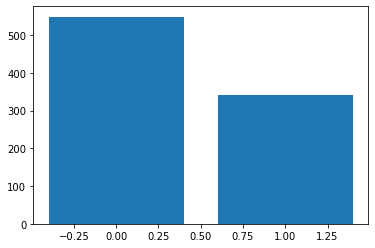

In [4]:
survived = training_data.Survived
plt.bar(survived.unique(),survived.value_counts())

<BarContainer object of 3 artists>

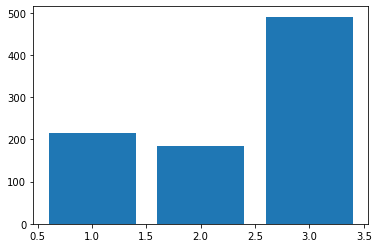

In [5]:
p_class = training_data.Pclass
plt.bar(p_class.unique(),p_class.value_counts())

<BarContainer object of 2 artists>

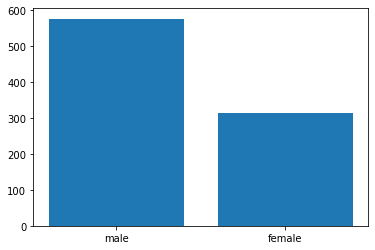

In [6]:
sex = training_data.Sex
plt.bar(sex.unique(),sex.value_counts())

<BarContainer object of 7 artists>

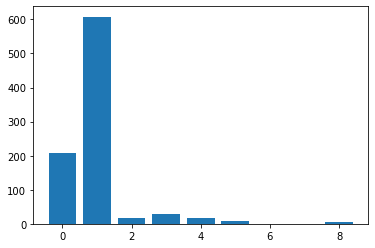

In [7]:
sibsp = training_data.SibSp
plt.bar(sibsp.unique(),sibsp.value_counts())

<BarContainer object of 7 artists>

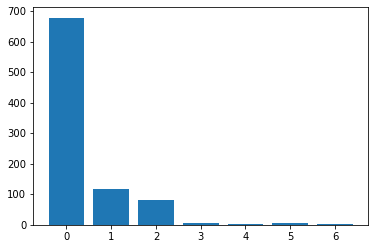

In [8]:
parch = training_data.Parch
plt.bar(parch.unique(),parch.value_counts())

<BarContainer object of 63 artists>

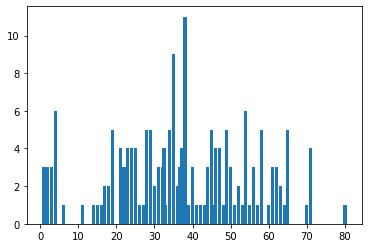

In [9]:
age = training_data.dropna().Age
plt.bar(age.unique(),age.value_counts())

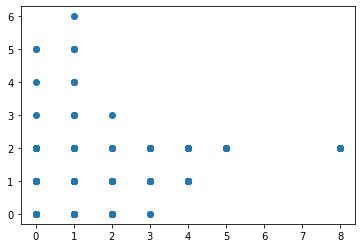

In [10]:
plt.scatter(training_data.SibSp, training_data.Parch)

### Pre-Processing

In [18]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
training_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
similarity_matrix = pd.DataFrame(1 - squareform(pdist(training_data.set_index('PassengerId'), lambda u,v: (u != v).mean())))
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,1.000000,0.181818,0.272727,0.272727,0.454545,0.363636,0.363636,0.363636,0.181818,0.181818,...,0.454545,0.454545,0.363636,0.454545,0.181818,0.363636,0.181818,0.363636,0.181818,0.363636
1,0.181818,1.000000,0.272727,0.454545,0.090909,0.090909,0.181818,0.000000,0.181818,0.454545,...,0.090909,0.181818,0.090909,0.090909,0.090909,0.090909,0.363636,0.181818,0.363636,0.090909
2,0.272727,0.272727,1.000000,0.363636,0.363636,0.272727,0.272727,0.181818,0.454545,0.272727,...,0.363636,0.454545,0.272727,0.363636,0.272727,0.272727,0.454545,0.272727,0.363636,0.272727
3,0.272727,0.454545,0.363636,1.000000,0.272727,0.090909,0.272727,0.090909,0.272727,0.363636,...,0.181818,0.272727,0.181818,0.181818,0.090909,0.181818,0.454545,0.272727,0.272727,0.090909
4,0.454545,0.090909,0.363636,0.272727,1.000000,0.454545,0.454545,0.363636,0.272727,0.090909,...,0.545455,0.454545,0.454545,0.545455,0.272727,0.454545,0.272727,0.272727,0.272727,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.363636,0.090909,0.272727,0.181818,0.454545,0.363636,0.454545,0.272727,0.272727,0.181818,...,0.454545,0.363636,0.545455,0.454545,0.181818,1.000000,0.272727,0.181818,0.272727,0.363636
887,0.181818,0.363636,0.454545,0.454545,0.272727,0.181818,0.363636,0.090909,0.363636,0.272727,...,0.272727,0.363636,0.272727,0.272727,0.181818,0.272727,1.000000,0.181818,0.454545,0.181818
888,0.363636,0.181818,0.272727,0.272727,0.272727,0.181818,0.181818,0.272727,0.363636,0.181818,...,0.272727,0.363636,0.181818,0.272727,0.272727,0.181818,0.181818,1.000000,0.000000,0.181818
889,0.181818,0.363636,0.363636,0.272727,0.272727,0.272727,0.363636,0.090909,0.181818,0.272727,...,0.272727,0.181818,0.272727,0.272727,0.090909,0.272727,0.454545,0.000000,1.000000,0.272727


In [20]:
le = preprocessing.LabelEncoder()

training_data_cleaned = training_data.drop(columns = ["Name", "Ticket", "Cabin"]).copy()

training_data_cleaned["Sex"] = le.fit_transform(training_data_cleaned["Sex"])
training_data_cleaned["Embarked"] = le.fit_transform(training_data_cleaned["Embarked"])

training_data_cleaned.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Replace missing "Age" values with the Age value of the most similar row

In [21]:
for (index, row) in training_data_cleaned.iterrows():
    if math.isnan(row.Age):
        
        replacement = 0
        
        exempt_numbers = [index]
        
        while math.isnan(replacement) or replacement == 0:
            similarity_indices = list(range(0,similarity_matrix.shape[0]))
            for number in exempt_numbers:
                similarity_indices.remove(number)

            most_similar_value = similarity_matrix.iloc[index, similarity_indices].max()

            most_similar_row = list(similarity_matrix.iloc[index, similarity_indices]).index(most_similar_value)
            replacement = training_data_cleaned.Age[most_similar_row].copy()
            
            if math.isnan(replacement):
                exempt_numbers.append(most_similar_row)
            
        training_data_cleaned.Age[index] = replacement
training_data_cleaned.isna().sum()

<ipython-input-21-f3b522dddd0c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data_cleaned.Age[index] = replacement


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Models

### Random Forest

In [22]:
training_data_model = training_data_cleaned.copy()
X = training_data_model.drop(columns = ['Survived']).copy()
print(len(X))
y = training_data_model['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 42)
print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))



891
X_train 623
X_test 268
y_train 623
y_test 268


In [23]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(len(rf_predictions))
print('Accuracy:')
accuracy_score(y_test, rf_predictions,normalize=True, sample_weight=None)

268
Accuracy:


0.8246268656716418